## Business Understanding:
Sarah sebagai regional sales manager ingin mengestimasi berapa banyak minyak pemanas (heating oil) yang harus disiapkan agar memenuhi permintaan customers baru. Dengan hal tersebut diharapkan dia dapat mengantisipasi adanya kelebihan atau kekurangan jumlah permintaan akan produk.

## STOCK LEVEL
Predictive Stock Level untuk kecukupan pelanggan baru sebanyak 42.650 pelanggan. Pelanggan yang ada (current pelanggan) 1218

Artinya sarah harus mencukupi ketersediaan heating oil untuk 50.219 pelanggan

case -- Supervised Learning -- Estimasi

Algoritma estimasi:
1. Liniear Regression
2. ANN MLP (Multi Layer Perceptron)

## Data Understanding

In [1]:
# Library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import googl edrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading data
url = '/content/drive/MyDrive/Colab Notebooks/MSIB/Data Mining/DataSource/heatingOilTrainingset.csv'
load_heatingOil = pd.read_csv(url)

# Membentuk data frame
df = pd.DataFrame(load_heatingOil)

df.head()

,Insulation,Temperature,Heating_Oil,Num_Occupants,Avg_Age,Home_Size
0,6,74,132,4,23.8,4
1,10,43,263,4,56.7,4
2,3,81,145,2,28.0,6
3,9,50,196,4,45.1,3
4,2,80,131,5,20.8,2


Pengertian di dapatkan dari buku:
1. Insulation: dirumah ada berapa ruangan, dan ada berapa sekat pemisah. Angka index. Semakin banyak indexnya semakin tinggi
2. Temperatur: mencerminkan suhu berdasarkan farenhait
3. Heating oil: berapa banyak dalam sekali beli dalam liter
4. Num_Occupants: penghuni rumah berkisar di angka berapa
5. Avg_Age: rata - rata umur penghuni
6. Num_size: besar rumahnya

In [4]:
df.isnull().sum()

Insulation       0
Temperature      0
Heating_Oil      0
Num_Occupants    0
Avg_Age          0
Home_Size        0
dtype: int64

In [5]:
df.isna().sum()

Insulation       0
Temperature      0
Heating_Oil      0
Num_Occupants    0
Avg_Age          0
Home_Size        0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Insulation     1218 non-null   int64  
 1   Temperature    1218 non-null   int64  
 2   Heating_Oil    1218 non-null   int64  
 3   Num_Occupants  1218 non-null   int64  
 4   Avg_Age        1218 non-null   float64
 5   Home_Size      1218 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 57.2 KB


## Analysis Korelasi

<Axes: title={'center': 'Person Correlation'}>

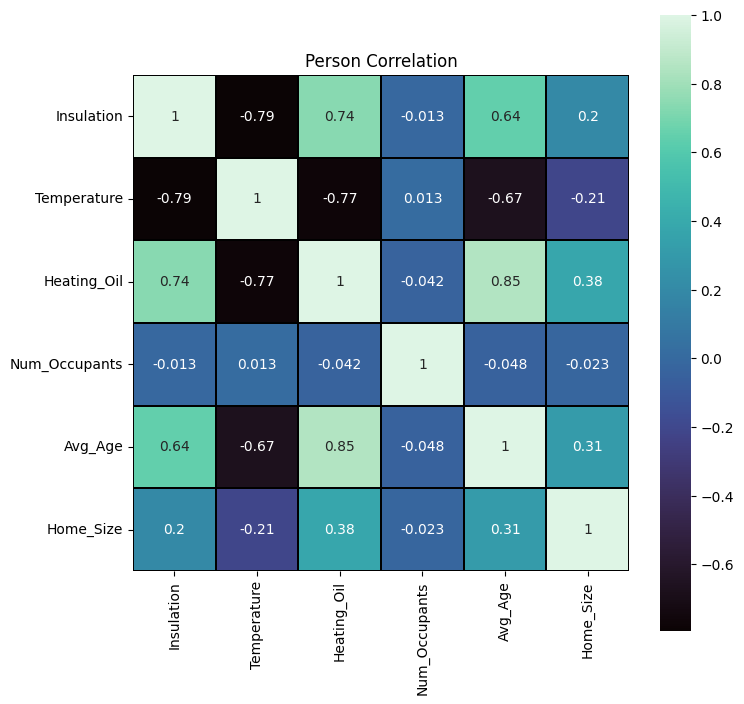

In [19]:
f, ax = plt.subplots(figsize=(8, 8))
plt.title('Person Correlation')
sns.heatmap(df.astype(float).corr(), linewidths=0.25, vmax=1.0, square=True, cmap='mako', linecolor='black', annot=True)

## Hasil Analisis
digunakan untuk feature selection

Dependent Variable : Heating_Oil

1. Ada hubungan positif menguatkan antara insulation dengan heating oil
2. Ada hubungan negative melemahkan antara temperature dengan heating oil, semakin suhu tinggi maka kebutuhan heating oil semakin sedikit
3. Ada hubungan negative melemahkan antara Num_Occupants dengan heating oil. Semakin banyak orang ruangan semakin hangat sehingga semakin sedikit kebutuhan hiting oil. Hasil menunjukkan -0.042 (tidak signifikan).
4. Ada hubungan positif menguatkan antara Avg_Age dengan heating oil. Semakin tinggi usia rata - rata penghuni maka semakin tinggi kebutuhan heating oil.
5. Tidak ada hubungan yang mempengaruhi secara signifikan anata home size dengan heating oil.


## Data Preparation

In [13]:
# Input variable
x = df[['Insulation', 'Temperature', 'Avg_Age', 'Home_Size']]

# Target Variable
y = df['Heating_Oil']

## Pemodelan Data

In [15]:
# Spliting training dan testing

from sklearn.model_selection import train_test_split # Import train_tes_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)

## Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
ln = LinearRegression()

# Memodelkan data menggunakan algoritma Linear Regression
model_ln = ln.fit(x_train,y_train)

# Melakukan predict pada data test
pred_ln = model_ln.predict(x_test)

## Evaluasi Pemodelan Linear Regression

1. MAPE
2. R2
3. MAE

In [23]:
# untuk evaluasi model
from sklearn import metrics

In [24]:
# Nilai R2
print('R Square: ', metrics.r2_score(y_test, pred_ln))

R Square:  0.8113780027125741


menunjukkan hubungan linearitas yang bagus. Semakin mendekati angka 1 semakin bagus.

In [25]:
# Nilai MAPE
def mean_absolut_percentage_error(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true -  y_pred) / y_true) * 100)


print('MAPE : ', mean_absolut_percentage_error(y_test, pred_ln))


MAPE :  7.854285481976762


termasuk bagus

## ANN (Artificial Neural Network)

1. MLP utuk data tabular. Untuk prediksi sederhana dan klasifikasi sederhana
2. CNN untuk data gambar
3. RNN untuk data yang sifatnya gambar, klasifikasi, dan regresi

In [26]:
from sklearn.neural_network import MLPRegressor

In [29]:
mlp = MLPRegressor()

# Memodelkan data menggunakan algoritma Linear Regression
model_mlp = mlp.fit(x_train,y_train)

# Melakukan predict pada data test
pred_mlp = model_mlp.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


relu (Rectified Linear Unit) = memungkin kan model untuk menyelesaikan masalah non linear

In [30]:
# Nilai R2
print('R Square: ', metrics.r2_score(y_test, pred_mlp))

R Square:  0.7540756533750148


In [31]:
# Nilai MAPE
def mean_absolut_percentage_error(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true -  y_pred) / y_true) * 100)


print('MAPE : ', mean_absolut_percentage_error(y_test, pred_mlp))

MAPE :  7.4079938423189775


## Kesimpulan:

yang terbaik adalah **ANN**. Karena fokusnya dilihat dari nilai errornya yang paling kecil. Klo Linear cuma dilihat dari tingkat liniaritas.

karena meninjau dari evaluasi MAPE yang menilai error suatu prediksi dengan hasil lebih rendah, dirasa lebih faktual dengan data real yang ada. mungkin kalau linearitas nya tinggi tapi error nya besar itu terhitung sedikit overfit.

Model yang dipilih: ANN MLP Regression dengan MAPE 7.40



## Implementasi Model

In [33]:
url_test = '/content/drive/MyDrive/Colab Notebooks/MSIB/Data Mining/DataSource/heatingOilNewust.csv'
load_ho = pd.read_csv(url_test)

df1 = pd.DataFrame(load_ho)
df1.head()

,Insulation,Temperature,Num_Occupants,Avg_Age,Home_Size
0,5,69,10,70.1,7
1,5,80,1,66.7,1
2,4,89,9,67.8,7
3,7,81,9,52.4,6
4,4,58,8,22.9,7


In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42650 entries, 0 to 42649
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Insulation     42650 non-null  int64  
 1   Temperature    42650 non-null  int64  
 2   Num_Occupants  42650 non-null  int64  
 3   Avg_Age        42650 non-null  float64
 4   Home_Size      42650 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 1.6 MB


## Apply Model

In [37]:
x1 = df1[['Insulation', 'Temperature', 'Avg_Age', 'Home_Size']]

In [38]:
# Predict Menggunakan Model SVM

prediction_mlp = model_mlp.predict(x1)

In [39]:
prediction_mlp

array([275.01250322, 241.5107176 , 263.13862807, ..., 124.97467388,
       262.76315109, 251.34573412])

In [40]:
df_result = pd.DataFrame({'prediction' : prediction_mlp}).round(2)
df_result.head()

,prediction
0,275.01
1,241.51
2,263.14
3,229.73
4,127.58


In [42]:
# menggabungkan kolom dengan hasil predik

df_pred_ho = pd.concat([df1 ,df_result],sort=True, axis=1)
df_pred_ho

,Insulation,Temperature,Num_Occupants,Avg_Age,Home_Size,prediction
0,5,69,10,70.1,7,275.01
1,5,80,1,66.7,1,241.51
2,4,89,9,67.8,7,263.14
3,7,81,9,52.4,6,229.73
4,4,58,8,22.9,7,127.58
...,...,...,...,...,...,...
42645,7,63,9,59.1,8,257.09
42646,7,84,1,43.6,5,199.40
42647,2,67,1,27.3,4,124.97
42648,8,58,1,65.7,3,262.76


In [46]:
# kebutuhan heating oil untuk new customer
df_pred_ho['prediction'].sum()

8286865.74

In [43]:
#Exports to CSV
# Export as download if in colab
from google.colab import files

# Menyimpan File/ Export to local.computer outpout CSV File
df_pred_ho.to_csv('df_pred_ho.csv')
files.download('df_pred_ho.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Stock untuk customer baru sekitar juta lebih kebutuhan heating oil untuk customer yang sudah ada sekitar 240.426

In [45]:
#Exports to Excel
# Export as download if in colab

# Menyimpan File/ Export to local.computer outpout CSV File
df_pred_ho.to_excel('df_pred_ho.xlsx', sheet_name='sheet1')
files.download('df_pred_ho.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>